In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
team_stats_df = pd.read_csv('data/nba1.txt',sep=',')
team_stats_df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Denver Nuggets,6,240.0,40.8,86.8,0.470,11.0,28.2,0.391,...,0.732,10.0,32.5,42.5,26.8,4.8,2.8,9.7,20.2,107.7
1,2,San Antonio Spurs,6,240.0,40.8,85.2,0.479,6.8,19.3,0.353,...,0.752,11.2,34.0,45.2,21.5,4.8,3.8,8.8,19.3,106.2
2,3,Golden State Warriors,5,240.0,44.2,89.0,0.497,13.4,32.6,0.411,...,0.879,11.0,35.0,46.0,31.0,7.2,7.2,15.2,26.2,123.6
3,4,Philadelphia 76ers,5,240.0,46.0,93.2,0.494,9.0,26.8,0.336,...,0.770,13.8,39.0,52.8,27.0,7.8,6.0,16.2,24.2,122.4
4,5,Los Angeles Clippers,5,240.0,40.2,87.8,0.458,11.6,31.6,0.367,...,0.814,8.8,29.6,38.4,26.0,8.2,3.0,15.0,24.8,115.6
5,6,Brooklyn Nets,5,240.0,38.4,91.4,0.420,11.0,34.0,0.324,...,0.808,11.4,29.2,40.6,19.2,7.4,2.8,14.2,22.8,111.4
6,7,Portland Trail Blazers,5,240.0,39.8,89.0,0.447,12.8,31.6,0.405,...,0.788,10.6,34.8,45.4,17.4,8.0,5.8,14.4,23.4,111.0
7,8,Houston Rockets,5,240.0,36.6,84.2,0.435,15.4,42.2,0.365,...,0.754,8.6,35.6,44.2,18.4,9.2,7.0,15.2,21.4,107.0
8,9,Toronto Raptors,5,240.0,40.4,84.4,0.479,12.0,32.6,0.368,...,0.850,7.0,37.6,44.6,26.2,8.4,4.2,12.2,23.0,106.4
9,10,Oklahoma City Thunder,5,240.0,37.8,86.0,0.440,10.4,31.4,0.331,...,0.756,10.2,33.0,43.2,22.6,6.6,5.4,15.2,24.2,105.2


In [4]:
team_opp_stats_df = pd.read_csv('data/nba2.txt',sep=',')
team_opp_stats_df.columns = ['Rk','Team','G'] + ['opp' + x for x in team_opp_stats_df.columns[3:]]
team_opp_stats_df

,Rk,Team,G,oppMP,oppFG,oppFGA,oppFG%,opp3P,opp3PA,opp3P%,...,oppFT%,oppORB,oppDRB,oppTRB,oppAST,oppSTL,oppBLK,oppTOV,oppPF,oppPTS
0,1,Boston Celtics,4,240.0,33.5,83.5,0.401,10.0,29.8,0.336,...,0.720,8.0,32.3,40.3,20.8,8.3,3.5,12.0,20.0,91.8
1,2,Milwaukee Bucks,4,240.0,37.5,96.8,0.388,11.0,33.3,0.331,...,0.727,10.8,31.5,42.3,23.0,7.3,4.0,10.5,24.3,98.0
2,3,Indiana Pacers,4,240.0,35.5,80.0,0.444,11.8,29.5,0.398,...,0.759,7.5,40.3,47.8,20.3,5.5,3.0,16.0,19.5,99.3
3,4,Toronto Raptors,5,240.0,32.2,83.0,0.388,10.4,34.8,0.299,...,0.775,9.6,33.8,43.4,19.0,6.6,4.0,15.6,18.8,92.0
4,5,Detroit Pistons,4,240.0,44.0,86.3,0.510,12.5,33.8,0.370,...,0.759,9.8,43.5,53.3,28.5,5.8,8.8,14.5,20.0,121.8
5,6,Houston Rockets,5,240.0,34.6,86.4,0.400,9.4,35.8,0.263,...,0.750,11.8,35.4,47.2,23.0,9.2,5.4,15.2,21.8,97.8
6,7,Portland Trail Blazers,5,240.0,37.8,86.0,0.440,10.4,31.4,0.331,...,0.756,10.2,33.0,43.2,22.6,6.6,5.4,15.2,24.2,105.2
7,8,Orlando Magic,5,240.0,40.4,84.4,0.479,12.0,32.6,0.368,...,0.850,7.0,37.6,44.6,26.2,8.4,4.2,12.2,23.0,106.4
8,9,Utah Jazz,5,240.0,36.6,84.2,0.435,15.4,42.2,0.365,...,0.754,8.6,35.6,44.2,18.4,9.2,7.0,15.2,21.4,107.0
9,10,Oklahoma City Thunder,5,240.0,39.8,89.0,0.447,12.8,31.6,0.405,...,0.788,10.6,34.8,45.4,17.4,8.0,5.8,14.4,23.4,111.0


In [5]:
mergedf = pd.merge(team_stats_df,team_opp_stats_df,on=['Team'])


float64


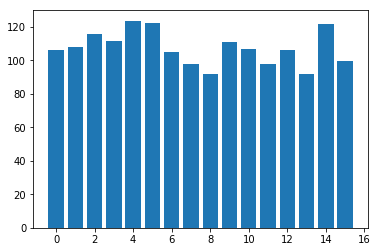

In [6]:
# mergedf['PTS'] = mergedf['PTS'].astype(np.float32)
# mergedf['oppPTS'] = mergedf['oppPTS'].astype(np.float32)
pts = np.array(mergedf[['PTS','oppPTS']].values.tolist())
print(pts.dtype)
index = np.arange(pts.shape[0])
plt.bar(index,pts[:,1])
plt.show()

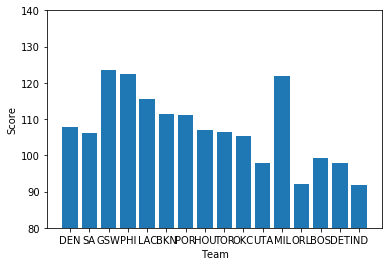

In [7]:
team_name = ['DEN','SA','GSW','PHI','LAC','BKN','POR','HOU','TOR','OKC','UTA','MIL','ORL','BOS','DET','IND']
plt.ylabel('Score') # 设置y轴的label
plt.xlabel('Team') # 设置x轴的label
plt.xticks(index,team_name) # 设置x轴的刻度
plt.yticks(np.arange(80,141,10)) #y轴的刻度
plt.ylim(80,140) # y轴的范围
plt.bar(index,pts[:,0]) # 绘制直方图
plt.rcParams['figure.figsize'] = (12.0, 6.0) # 修改图片大小
plt.show()

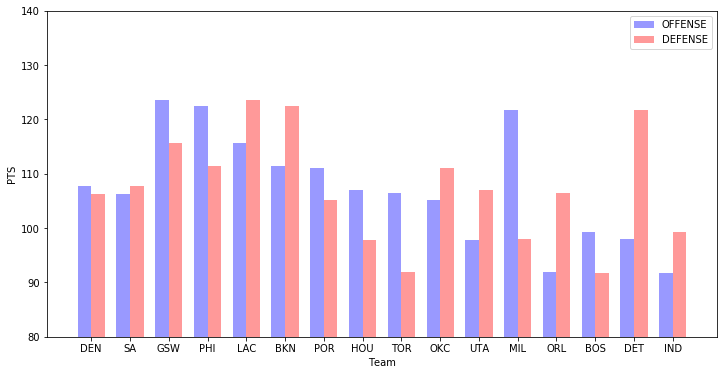

In [8]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, pts[:,0], bar_width,
                alpha=opacity, color='b',
                label='OFFENSE')

rects2 = ax.bar(index + bar_width, pts[:,1], bar_width,
                alpha=opacity, color='r',
                label='DEFENSE')

ax.set_xlabel('Team')
ax.set_ylabel('PTS')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(team_name)
ax.set_yticks(np.arange(80,141,10)) #y轴的刻度
ax.set_ylim(80,140) # y轴的范围
ax.legend()

plt.show()

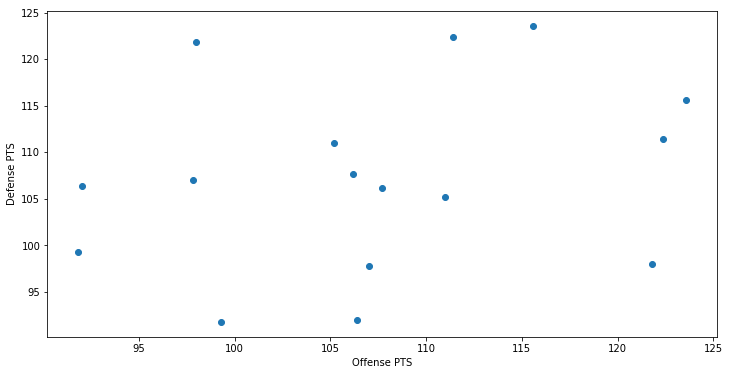

In [9]:
plt.scatter(pts[:,0], pts[:,1])
plt.xlabel('Offense PTS') # 设置x轴的label
plt.ylabel('Defense PTS') # 设置y轴的label
plt.show()

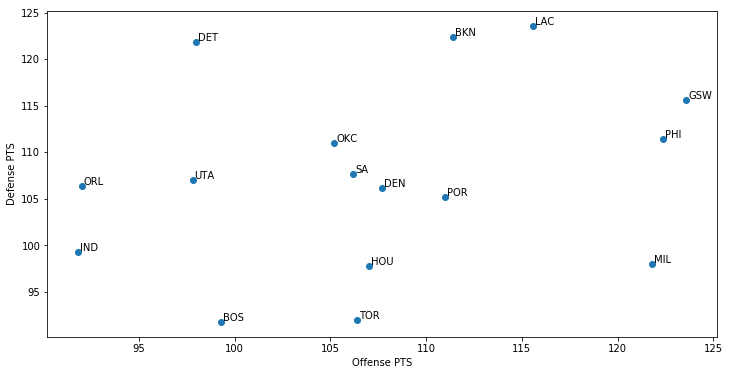

In [10]:
plt.scatter(pts[:,0], pts[:,1])
plt.xlabel('Offense PTS') # 设置x轴的label
plt.ylabel('Defense PTS') # 设置y轴的label
for i in range(len(pts[:,0])):
    plt.annotate(team_name[i], xy = (pts[i,0], pts[i,1]), xytext = (pts[i,0]+0.1, pts[i,1]+0.1)) # 这里xy是需要标记
plt.show()

107.325 107.325


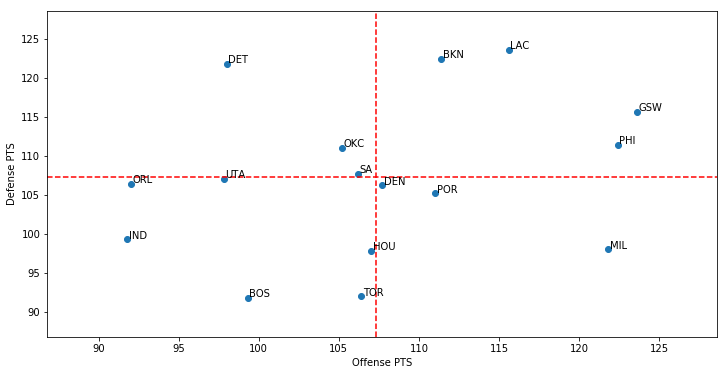

In [11]:
offense_mean = np.mean(pts[:,0])
defense_mean = np.mean(pts[:,1])
print(offense_mean,defense_mean)
plt.scatter(pts[:,0], pts[:,1])
plt.vlines(np.mean(pts[:,0]), np.min(pts[:,1])-5,np.max(pts[:,1])+5,colors = "r", linestyles = "dashed")
plt.hlines(np.mean(pts[:,1]), np.min(pts[:,0])-5,np.max(pts[:,0])+5,colors = "r", linestyles = "dashed")
plt.ylim(np.min(pts[:,1])-5,np.max(pts[:,1])+5) # y轴的范围
plt.xlim(np.min(pts[:,0])-5,np.max(pts[:,0])+5) # x轴的范围
plt.xlabel('Offense PTS') # 设置x轴的label
plt.ylabel('Defense PTS') # 设置y轴的label
for i in range(len(pts[:,0])):
    plt.annotate(team_name[i], xy = (pts[i,0], pts[i,1]), xytext = (pts[i,0]+0.1, pts[i,1]+0.1)) # 这里xy是需要标记
plt.show()

In [16]:
two_team_stats = mergedf[(mergedf['Team']=='Houston Rockets') | (mergedf['Team']=='Golden State Warriors')]

   Rk_x                   Team  G_x     MP    FG   FGA    FG%    3P   3PA  \
2     3  Golden State Warriors    5  240.0  44.2  89.0  0.497  13.4  32.6   
7     8        Houston Rockets    5  240.0  36.6  84.2  0.435  15.4  42.2   

     3P%   ...    oppFT%  oppORB  oppDRB  oppTRB  oppAST  oppSTL  oppBLK  \
2  0.411   ...     0.814     8.8    29.6    38.4    26.0     8.2     3.0   
7  0.365   ...     0.750    11.8    35.4    47.2    23.0     9.2     5.4   

   oppTOV  oppPF  oppPTS  
2    15.0   24.8   115.6  
7    15.2   21.8    97.8  

[2 rows x 49 columns]


In [22]:
hou_and_gsw_df = two_team_stats[['FG%','3P%','TRB','AST','STL','BLK','PTS','oppPTS','TOV']]
print(hou_and_gsw_df)
hou_and_gsw_data = np.array(hou_and_gsw_df.values.tolist())

hou_and_gsw_data[:,0] = hou_and_gsw_data[:,0] / 0.55
hou_and_gsw_data[:,1] = hou_and_gsw_data[:,1] / 0.55
hou_and_gsw_data[:,2] = hou_and_gsw_data[:,2] / 55
hou_and_gsw_data[:,3] = hou_and_gsw_data[:,3] / 40
hou_and_gsw_data[:,4] = hou_and_gsw_data[:,4] / 12
hou_and_gsw_data[:,5] = hou_and_gsw_data[:,5] / 12
hou_and_gsw_data[:,6] = hou_and_gsw_data[:,6] / 130
hou_and_gsw_data[:,7] = hou_and_gsw_data[:,7] / 130
hou_and_gsw_data[:,8] = hou_and_gsw_data[:,8] / 20
print(hou_and_gsw_data)

     FG%    3P%   TRB   AST  STL  BLK    PTS  oppPTS   TOV
2  0.497  0.411  46.0  31.0  7.2  7.2  123.6   115.6  15.2
7  0.435  0.365  44.2  18.4  9.2  7.0  107.0    97.8  15.2
[[ 0.90363636  0.74727273  0.83636364  0.775       0.6         0.6
   0.95076923  0.88923077  0.76      ]
 [ 0.79090909  0.66363636  0.80363636  0.46        0.76666667  0.58333333
   0.82307692  0.75230769  0.76      ]]


/Users/meituan_sxw/Anaconda/anaconda/envs/python3_5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Microsoft Yahei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/meituan_sxw/Anaconda/anaconda/envs/python3_5/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


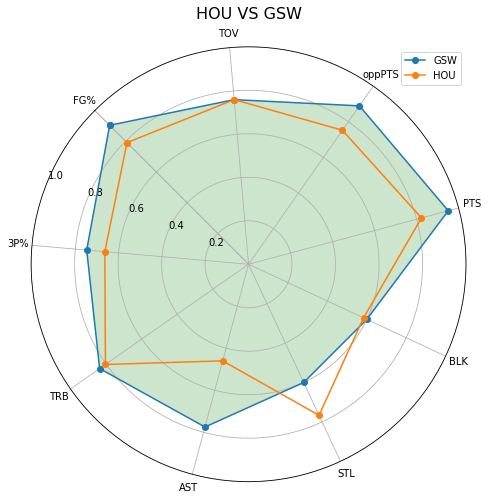

In [25]:
fig=plt.figure(figsize=(14,8))
ax1=fig.add_subplot(1,1,1,polar=True) #设置第一个坐标轴为极坐标体系

gsw=hou_and_gsw_data[0,:] #提取GSW的信息
hou=hou_and_gsw_data[1,:] #提取HOU的信息
label=np.array([j for j in hou_and_gsw_df.columns]) #提取标签

angle = np.linspace(0, 2*np.pi, len(gsw), endpoint=False) #有几个label，就把整圆360°分成几份
angles = np.concatenate((angle, [angle[0]])) #增加第一个angle到所有angle里，以实现闭合
gsw = np.concatenate((gsw, [gsw[0]])) #增加gsw的第一项数据，以实现闭合
hou = np.concatenate((hou, [hou[0]])) #增加hou的第一项数据，以实现闭合

ax1.set_thetagrids(angles*180/np.pi, label, fontproperties="Microsoft Yahei") #设置网格标签
ax1.plot(angles,gsw,"o-",label='GSW')
ax1.plot(angles,hou,"o-",label='HOU')
ax1.set_theta_zero_location('NW') #设置极坐标0°位置
ax1.set_rlim(0,1) #设置显示的极径范围
ax1.fill(angles,gsw,facecolor='g', alpha=0.2) #填充颜色
ax1.set_title("HOU VS GSW",fontproperties="SimHei",fontsize=16) #设置标题
plt.legend(loc = 'best')
plt.show()


In [24]:
print(np.linspace(0, 2*np.pi, 9, endpoint=False))

[ 0.          0.6981317   1.3962634   2.0943951   2.7925268   3.4906585
  4.1887902   4.88692191  5.58505361]
